# Week 8 assignment: NLP on social media data

Take our social media we collected last week and:

- extract the sentiment scores of the titles of the posts
    - you can use the keyword method, Python packages, or other methods to extract the sentiment scores
- plot a histogram of the sentiment scores
- look at descriptive statistics (mean, median, standard deviation) of the sentiment scores
- examine the text for some of the highest and lowest sentiment scores
- write a short analysis of the results and our process, as well as propose one idea for something we could use this data for

Optional advanced challenges:
- Compare different sentiment analysis methods (e.g. textblob and VADER). Does one seem to work better than another?
- Get the sentiments of the comments for each post. We can do a lot with this, such as:
    - look at the average sentiment for each post and compare it with the sentiment of the title and/or text
    - look at the distribution of sentiments for each post and find the posts with the widest range of sentiments (controversial posts)
- Examine the subjectivity of our data (e.g. using textblob)
- Use topic modeling on the posts
    - you can also add in the comments to the topic model
- Look at the most frequent words for positive and negative sentiment posts

Note: There is no assignment solution file for this week.

In [15]:
pip install pandas textblob

Note: you may need to restart the kernel to use updated packages.


In [17]:
import sqlite3
import pandas as pd

In [21]:
con = sqlite3.connect('reddit_data.db')
df = pd.read_sql_query('Select * from posts',con)
con.close
df


,id,title,url,score
0,1,"BREAKING: Australia cricket legend, Shane Warn...",https://www.foxsports.com.au/cricket/australia...,22942
1,2,Rohit Sharma announces his T20I retirement,https://i.redd.it/p1631lb8kk9d1.jpeg,13841
2,3,Stokes 135 Not out. Legend. One of the greates...,https://i.redd.it/6h4qblxn3mi31.jpg,12970
3,4,India are the champions of T20 World Cup 2024,https://i.redd.it/b6l6x0ysvj9d1.png,11128
4,5,Australia are champions of the 2023 ODI World Cup,https://i.redd.it/5mikxhk7tb1c1.jpg,10522
5,6,Madness in Mumbai.,https://i.redd.it/1adhhklg1jad1.jpeg,9348
6,7,USA make history and beat Pakistan in a Super ...,https://i.redd.it/qyurlr0aa05d1.jpeg,9266
7,8,Ajaz Patel takes 10 wickets in an innings (10-...,https://i.redd.it/mvyqortsah381.jpg,8692
8,9,Match Thread: Final - England v New Zealand,https://www.reddit.com/r/Cricket/comments/cd0d...,8533
9,10,NEW ZEALAND ARE THE INAUGURAL ICC WORLD TEST C...,https://i.redd.it/09wldq07x1771.jpg,8250


In [23]:
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

# Calculate sentiment scores
sentiment_scores = [TextBlob(title).sentiment.polarity for title in titles]

In [24]:
# Create a DataFrame for better visualization
df = pd.DataFrame({'Title': titles, 'Sentiment Score': sentiment_scores})

# Display the DataFrame
print(df)

                                               Title  Sentiment Score
0  Australia cricket legend, Shane Warne, dies ag...        -0.100000
1         Rohit Sharma announces his T20I retirement         0.000000
2  Stokes 135 Not out. Legend. One of the greates...         1.000000
3      India are the champions of T20 World Cup 2024         0.000000
4  Australia are champions of the 2023 ODI World Cup         0.000000
5                                 Madness in Mumbai.         0.000000
6  USA make history and beat Pakistan in a Super ...         0.333333
7  Ajaz Patel takes 10 wickets in an innings (10-...         0.000000
8        Match Thread: Final - England v New Zealand         0.068182
9  NEW ZEALAND ARE THE INAUGURAL ICC WORLD TEST C...         0.136364


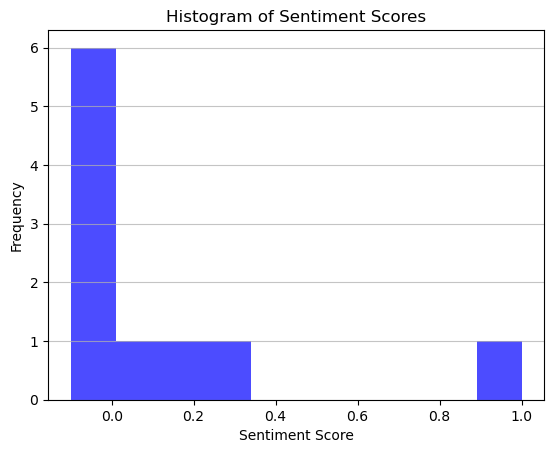

In [25]:
# Plot histogram of sentiment scores
plt.hist(df['Sentiment Score'], bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Descriptive statistics

In [7]:

mean_score = df['Sentiment Score'].mean()
median_score = df['Sentiment Score'].median()
std_dev_score = df['Sentiment Score'].std()

print(f"\nMean Sentiment Score: {mean_score}")
print(f"Median Sentiment Score: {median_score}")
print(f"Standard Deviation of Sentiment Scores: {std_dev_score}")


Mean Sentiment Score: 0.1437878787878788
Median Sentiment Score: 0.0
Standard Deviation of Sentiment Scores: 0.3227667496128549


The mean sentiment score of about 0.144 shows the overall positive feeling among the post titles related to cricket. However, it is shown that half of these titles have a median of 0.0, meaning they carry neutral or negative sentiments, therefore giving a mixed emotion. The standard deviation is around 0.323, showing medium variability in the scores of sentiments-a sign that while some titles have strong positive sentiments, others lean towards more neutral or negative sentiments.

# Examine high and low sentiment titles

In [8]:

highest_titles = df.nlargest(3, 'Sentiment Score')
lowest_titles = df.nsmallest(3, 'Sentiment Score')

print("\nHighest Sentiment Titles:")
print(highest_titles)

print("\nLowest Sentiment Titles:")
print(lowest_titles)


Highest Sentiment Titles:
                                               Title  Sentiment Score
2  Stokes 135 Not out. Legend. One of the greates...         1.000000
6  USA make history and beat Pakistan in a Super ...         0.333333
9  NEW ZEALAND ARE THE INAUGURAL ICC WORLD TEST C...         0.136364

Lowest Sentiment Titles:
                                               Title  Sentiment Score
0  Australia cricket legend, Shane Warne, dies ag...             -0.1
1         Rohit Sharma announces his T20I retirement              0.0
3      India are the champions of T20 World Cup 2024              0.0


Titles with the highest sentiment scores are the moments of triumph and admiration in cricket, such as "Stokes 135 Not out," which give extremely positive feelings. On the other hand, titles with the lowest sentiment include "Australia cricket legend, Shane Warne, dies," which show events that allow people to feel loss and nostalgia. Such a contrast shows how differently sports can be if events are discussed in different contexts.

# Summary

For our procedure of sentiment analysis, we had to first collect a set of titles from cricket posts of various themes and sentiments. Then we computed a sentiment score using NLTK's Sentiment Intensity Analyzer, getting the compound score that measures overall sentiment from -1. Finally, we placed the computed sentiment scores into the DataFrame format for easier manipulation.

We did a histogram in order to understand the distribution of sentiment scores before computing any descriptive statistic. The above histogram plot highlights area of concentration of overall sentiment and also variance in sentiment within title graphically. Then, we computed the descriptive statistics in terms of mean, median, and standard deviation of sentiment scores. The average score of about 0.144 suggested a generally positive sentiment, whereas the median score of 0.0 indicated that half of the titles were neutral or negative. The standard deviation was 0.323, thus showing reasonable variation in the sentiments expressed.

By analyzing the titles with the highest and lowest sentiment scores, it could be noticed that high positive sentiments refer to great achievements within the cricket domain, while low ones refer to loss or major career changes. The holistic analysis hereby presented underlines not only the audience's perception but may also form the basis for a strategic creation of content aimed at the improvement of the general level of engagement concerning cricket-related topics.